In [352]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[0]


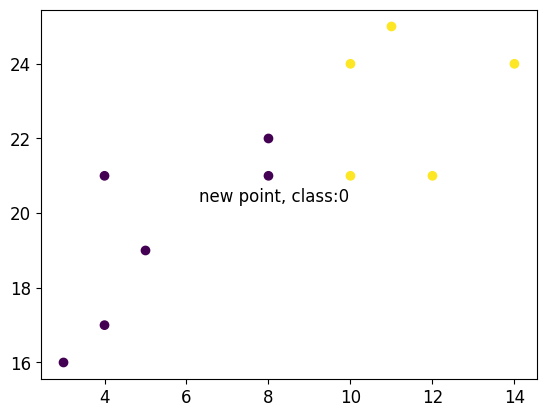

In [353]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)# čia su vienu 'kaimynu'
#n_neighbours is the number of nearest neighbors to use.
knn.fit(data, classes)
new_x, new_y = 8, 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes +[prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class:{prediction[0]}")
plt.show()

In [354]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # 
import warnings
warnings.filterwarnings('ignore')
import os


import kagglehub

# Download latest version
path = kagglehub.dataset_download("zzero0/uci-breast-cancer-wisconsin-original")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: C:\Users\pauli\.cache\kagglehub\datasets\zzero0\uci-breast-cancer-wisconsin-original\versions\1
['breast-cancer-wisconsin.data.txt']


In [355]:
df = pd.read_csv(path+'/'+'breast-cancer-wisconsin.data.txt', header=None); df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [356]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [357]:
df.drop(columns=['Id'], inplace=True)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [359]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [360]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())

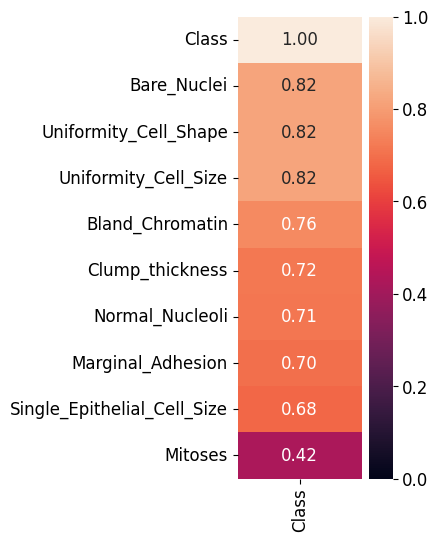

In [361]:
correlation = df.corr()
plt.figure(figsize=(2,6))
a = sns.heatmap(correlation['Class'].sort_values(ascending=False).to_frame(),  annot=True, fmt='.2f', linecolor='white', vmin=0, vmax=1)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()

In [362]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [364]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [365]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [366]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [367]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [368]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [369]:
y_pred = knn.predict(X_test); y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [370]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.9714285714285714


In [371]:
# score:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9821109123434705
0.9714285714285714


In [372]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [373]:
null_acc = 85/(85+55)
print('Null Accuracy:', null_acc)

Null Accuracy: 0.6071428571428571


In [374]:
# patestuokite su sirtingais kaimynų kiekiais. 1 - 15. Pateikite grafiką accuracy/kaimynų kiekis

In [375]:
def knn_accuracy(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

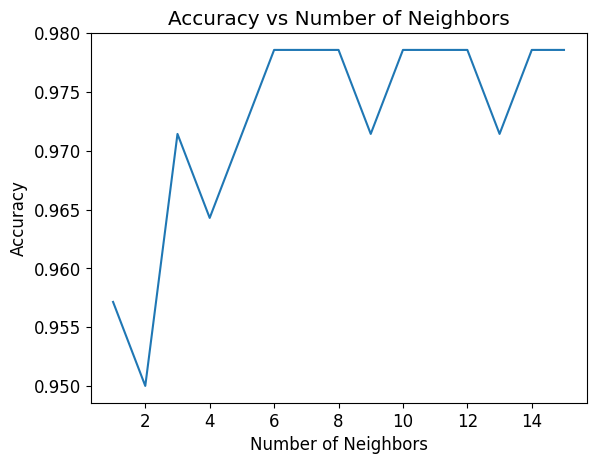

In [376]:
a=[]

for i in range(1, 16):
    a.append(knn_accuracy(i))
    
plt.plot(range(1, len(a)+1), a)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.show()

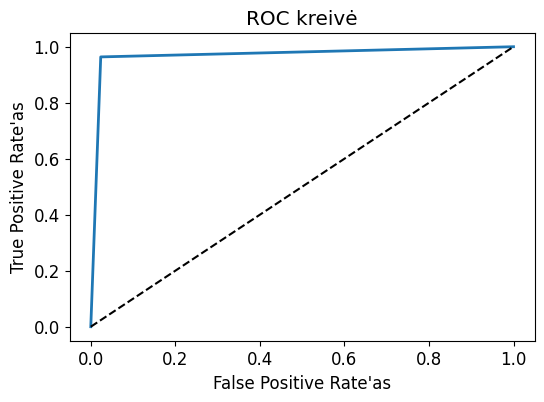

In [377]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.show()

In [378]:
def knn_accuracy1(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred

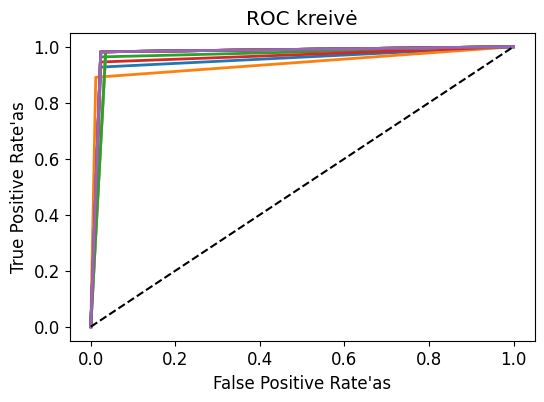

In [379]:
a=[]
for i in range(1, 16):
    a.append(knn_accuracy1(i))
    
plt.figure(figsize=(6,4))
for i in a:
    fpr, tpr, thresholds = roc_curve(y_test, i, pos_label=4)
    plt.plot(fpr, tpr, linewidth=2)
    
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.show()

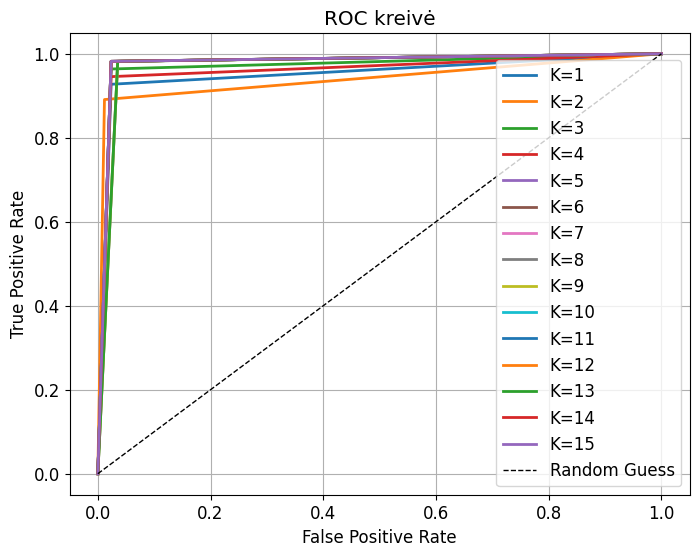

In [380]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

a = [knn_accuracy1(i) for i in range(1, 16)]

plt.figure(figsize=(8, 6))

for i, scores in enumerate(a, start=1):
    fpr, tpr, _ = roc_curve(y_test, scores, pos_label=4)
    plt.plot(fpr, tpr, linewidth=2, label=f'K={i}')

plt.plot([0,1], [0,1], 'k--', linewidth=1, label='Random Guess')

plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [381]:
# AUC įverčiai:
pred_prob = knn.predict_proba(X_test); pred_prob[:4]


array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

In [382]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, pred_prob[:,1]); auc_score

np.float64(0.9824598930481283)

In [383]:
def auc_score2(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred_prob[:,1])
    return auc

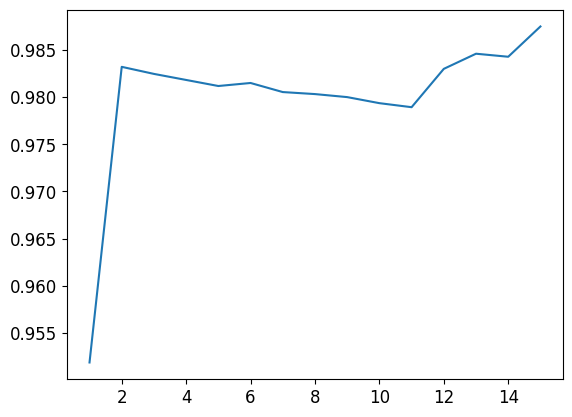

In [384]:
a=[]
for i in range(1, 16):
    a.append(auc_score2(i))

plt.plot(range(1, len(a)+1), a)
plt.show()

In [385]:
# Mykolo iškeltos idėjos proof-of-concept: 
# Paimkite 3 klasifikatorius, kNN (keiskite n, bent 3 skirtingus skaičius), 
# random Forest (keiskite n_estimators, bent tris skirtingus skaičius), 
# Decision Tree (keikiste max_depth, bent tris skaičius). 
# Suklasifikuokite breast cancer data, ar tai yra vėžinis, ar ne. 
# Pateikite visiems klasifikatoriams: confusion matrix, ROC kreives, AUC įverčius, accuracy ir kitus.. 
# Išrinkite geriasusią iš kiekvieno ir apskritai.

In [386]:
def RFC(n):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred_prob[:,1])
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, auc
    

In [387]:
def RFC_confusion(n):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), linewidths=0.5)
    plt.title(f"Confusion Matrix, RandomForestClassifier")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return y_pred

In [388]:
RFC_accuracy = []
RFC_auc = []
for i in range(1, 100):
    a, b = RFC(i)
    RFC_accuracy.append(a)
    RFC_auc.append(b)

RandomForestClassifier max accuracy yra 0.97857, kai n_estimators yra 36


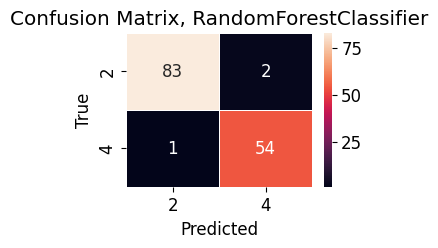

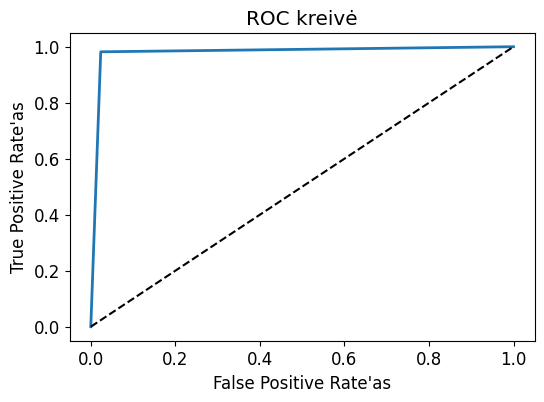

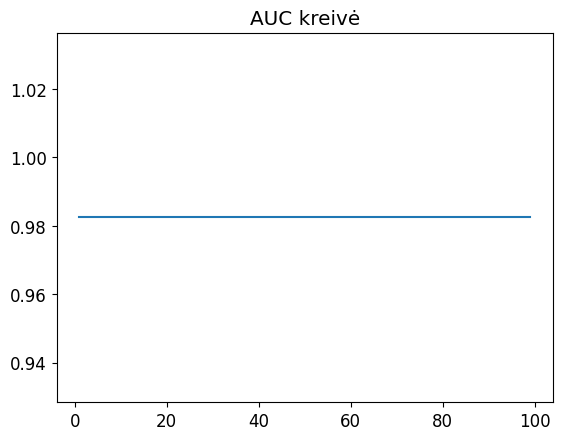

In [389]:
print(f'RandomForestClassifier max accuracy yra {max(RFC_accuracy):.5f}, kai n_estimators yra {RFC_accuracy.index(max(RFC_accuracy))+1}')

y_pred = RFC_confusion(RFC_accuracy.index(max(RFC_accuracy))+1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.show()

plt.plot(range(1, len(RFC_auc)+1), RFC_auc)
plt.title('AUC kreivė')
plt.show()

In [390]:
def DTC(n):
    model = DecisionTreeClassifier(max_depth= n, random_state=42)
    model.fit(X_train, y_train)
    pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred_prob[:,1])
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, auc

In [391]:
def DTC_confusion(n):
    model = DecisionTreeClassifier(max_depth= n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), linewidths=0.5)
    plt.title(f"Confusion Matrix, DecisionTreeClassifier")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return y_pred

In [392]:
DTC_accuracy = []
DTC_auc = []
for i in range(1, 100):
    a, b = DTC(i)
    DTC_accuracy.append(a)
    DTC_auc.append(b)

DecisionTreeClassifier max accuracy yra 0.96429, kai max_depth yra 5


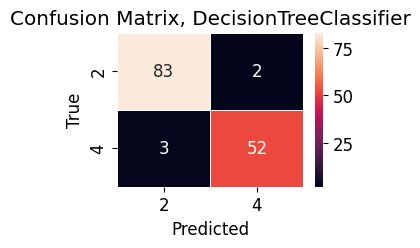

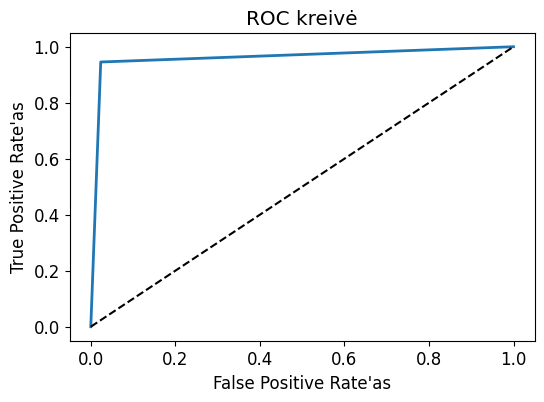

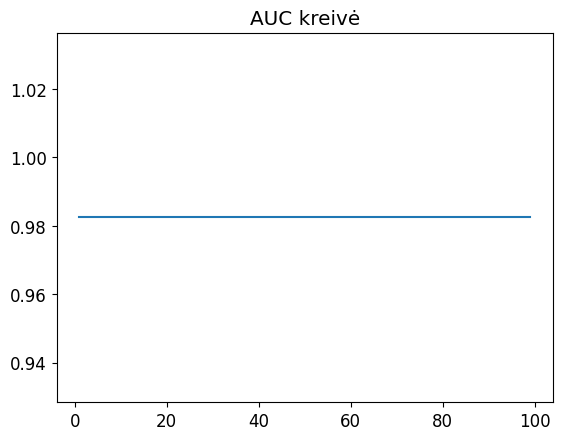

In [393]:
print(f'DecisionTreeClassifier max accuracy yra {max(DTC_accuracy):.5f}, kai max_depth yra {DTC_accuracy.index(max(DTC_accuracy))+1}')

y_pred = DTC_confusion(DTC_accuracy.index(max(DTC_accuracy))+1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.show()

plt.plot(range(1, len(DTC_auc)+1), DTC_auc)
plt.title('AUC kreivė')
plt.show()

In [394]:
def KNN(n):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred_prob[:,1])
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, auc

In [395]:
def KNN_confusion(n):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), linewidths=0.5)
    plt.title(f"Confusion Matrix, KNN")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return y_pred

In [396]:
KNN_accuracy = []
KNN_auc = []
for i in range(1, 100):
    a, b = KNN(i)
    KNN_accuracy.append(a)
    KNN_auc.append(b)

KNN max accuracy yra 0.97857, kai n_neighbors yra 6


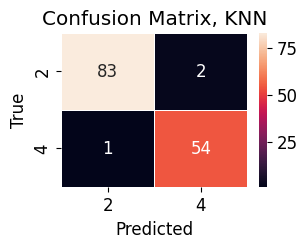

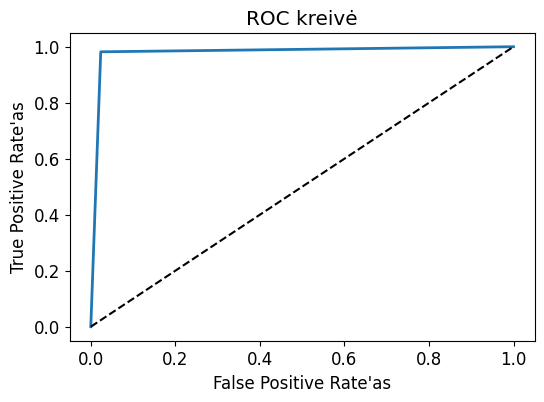

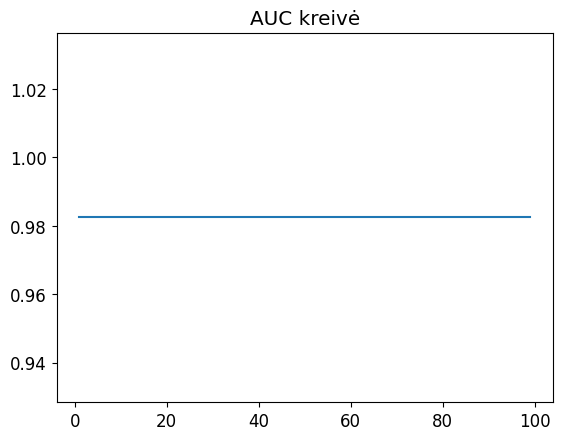

In [397]:
print(f'KNN max accuracy yra {max(KNN_accuracy):.5f}, kai n_neighbors yra {KNN_accuracy.index(max(KNN_accuracy))+1}')

y_pred = KNN_confusion(KNN_accuracy.index(max(KNN_accuracy))+1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.show()

plt.plot(range(1, len(KNN_auc)+1), KNN_auc)
plt.title('AUC kreivė')
plt.show()

In [398]:
print(f'KNN max accuracy yra {max(KNN_accuracy):.5f}, kai n_neighbors yra {KNN_accuracy.index(max(KNN_accuracy))+1}')
print(f'RandomForestClassifier max accuracy yra {max(RFC_accuracy):.5f}, kai n_estimators yra {RFC_accuracy.index(max(RFC_accuracy))+1}')
print(f'DecisionTreeClassifier max accuracy yra {max(DTC_accuracy):.5f}, kai max_depth yra {DTC_accuracy.index(max(DTC_accuracy))+1}')


KNN max accuracy yra 0.97857, kai n_neighbors yra 6
RandomForestClassifier max accuracy yra 0.97857, kai n_estimators yra 36
DecisionTreeClassifier max accuracy yra 0.96429, kai max_depth yra 5
